# Analysis of Plant Growth Experiment
_______________________________________
## Introduction
This notebook analyzes the results of an experiment on plant growth, where the goal is to compare the dried weight of plants under three conditions:

Control group (`ctrl`)<br>
Treatment 1 (`trt1`)<br>
Treatment 2 (`trt2`)<br>

The dataset, PlantGrowth, consists of thirty observations with two variables:<br>
**weight**: Numeric values representing the dried weight of plants.<br>
**group**: A factor variable with three levels (ctrl, trt1, and trt2), indicating the treatment applied.<br>

Statistical tests will be performed, including:
**$t$-tests**: To compare the mean weights between specific groups.
**ANOVA**: To assess whether significant differences in mean weights exist across all three groups.
The analysis is aimed at determining whether the treatment conditions have a significant effect on plant growth compared to the control group.
____________________________

In [1]:
# Importing standard libraries

import math  # Mathematical functions
import random  # Functions for generating random numbers
import pandas as pd  # Library for data manipulation and analysis

# Working with numerical arrays
import numpy as np
import itertools

# Libraries for data visualization
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Advanced statistical plotting

# Libraries for statistical analysis
import itertools  # Functions for creating iterator-based operations
from scipy import stats  # Statistical functions
from scipy.stats import shapiro  # Shapiro-Wilk test for normality
from scipy.stats import levene

# One-way ANOVA function
from scipy.stats import f_oneway

## Data description

In [2]:
## Saving the data
data = pd.read_csv("PlantGrowth.csv")
#data

The data is stored in a format where the groups are not split into different columns. 

In [3]:
# Splitting into three groups.

# The Control group's data
control = data[data['group']=='ctrl']['weight']

# The Treatment one data
trit1 = data[data['group']=='trt1']['weight']

# The Treatment two data
trit2 = data[data['group']=='trt2']['weight']


In [4]:
# The describe() method provides a statistical summary of the data
# pd.concat concatenates data for better visualization
describe_results = pd.concat([control.describe(),trit1.describe(), trit2.describe()], axis=1)
describe_results.columns= ['control', 'trit1','trit2']
describe_results

,control,trit1,trit2
count,10.000000,10.000000,10.000000
mean,5.032000,4.661000,5.526000
std,0.583091,0.793676,0.442573
min,4.170000,3.590000,4.920000
25%,4.550000,4.207500,5.267500
50%,5.155000,4.550000,5.435000
75%,5.292500,4.870000,5.735000
max,6.110000,6.030000,6.310000


The `trit1` group has a lower average weight (4.66) compared to the `control` group (5.03) and the `trit2` group (5.53).<br> The `trit1` group also shows more variability in weight, with a higher standard deviation of 0.79. This suggests that the weights in the `trit1` group are more spread out, whereas the `control` and `trit2` groups have lower variability, with standard deviations of 0.58 and 0.44, respectively.<br> Additionally, the `trit1` group has a wider range of weights, from a minimum of 3.59 to a maximum of 6.03, while the control group ranges from 4.17 to 6.11, and the `trit2` group ranges from 4.92 to 6.31.

In conclusion, the `trit1` group stands out with lower and more variable weights, which could indicate that the treatment or condition applied to this group had a different effect compared to the other two groups.

## $t$-test

The $t$-test is used to determine if the difference between the means of two groups is statistically significant. 

### Steps:

#### Check the Assumptions.
When conducting a $t$-test, some [assumptions](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php) should be considered.<br> 
#### Define the Hypotheses:
Null Hypothesis (H₀): The means of the two groups are equal (no significant difference).
Alternative Hypothesis (H₁): The means of the two groups are not equal (there is a significant difference).
#### Calculate the $t$-Statistic and p-value:
[t-test for independent samples](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)<br>
#### Determine the p-Value:
The p-value is a number that helps us understand if the results of a test are meaningful or just happened by chance. It tells us how likely it is to see the data we have if the null hypothesis (which assumes no difference or effect) is true.
#### Make a Decision:
* A small **p-value (usually less than 0.05)** means the results are unlikely to happen by chance, so we might reject the null hypothesis and say there is a significant difference or effect.
* A large **p-value (greater than 0.05)** means the results could easily happen by chance, so we don't have enough evidence to reject the null hypothesis.
#### Types of $t$-tests:
Independent t-Test: For two unrelated groups.
Paired t-Test: For two related groups (e.g., before and after treatment).

### Assumptions for the Independent $t$-test

1. Assumption of normality of the dependent variable.
The independent t-test requires that the dependent variable is approximately normally distributed within each group. Can be tested with the Shapiro-Wilk Test.

**The Null hypothesis**: the random variable in the sample is normally distributed.<br>
**The Alternative Hypothesis**: The random variable in the sample is not normally distributed.<br>
The significance level, or alpha level, is the probability of making the wrong decision when the null hypothesis is true (Type I error).
Setting alpha = 0.05, meaning the probability of making a Type I error is 5%.

If **p-value < alpha**, we reject the null hypothesis, indicating that the data likely does not follow a normal distribution.

If **p-value > alpha**, we fail to reject the null hypothesis, meaning we do not have enough evidence to conclude that the sample data does not come from a normal distribution.

In [5]:
# Function for performing the Shapiro-Wilk Test

def test_normal(data_sample, alpha=0.05):
    result = shapiro(data_sample)
    
    if result[1] > alpha:
        print(
            f'We did not get enough evidence to reject The Null Hypothysis \nthat the random variable in the sample is normally distributed. P-Value = {round(result[1],2)}'
        )
    else:
        print(f'There is no evedense to accept The Null Hypothysis. P-Value = {round(result[1],2)}'
        )

print('Results of the Shapiro-Wilk Test for control group:')
print(test_normal(control))
print('_______________________________________')
print('Results of the Shapiro-Wilk Test for Treatment 1 group:')
print(test_normal(trit1))
print('_______________________________________')
print('Results of the Shapiro-Wilk Test for Treatment 2 group:')
print(test_normal(trit2))
print('_______________________________________')


Results of the Shapiro-Wilk Test for control group:
We did not get enough evidence to reject The Null Hypothysis 
that the random variable in the sample is normally distributed. P-Value = 0.75
None
_______________________________________
Results of the Shapiro-Wilk Test for Treatment 1 group:
We did not get enough evidence to reject The Null Hypothysis 
that the random variable in the sample is normally distributed. P-Value = 0.45
None
_______________________________________
Results of the Shapiro-Wilk Test for Treatment 2 group:
We did not get enough evidence to reject The Null Hypothysis 
that the random variable in the sample is normally distributed. P-Value = 0.56
None
_______________________________________


The Shapiro-Wilk Test conducted for the groups shows that the data is normally distributed.

2. The data doesn't contain significant outliers.

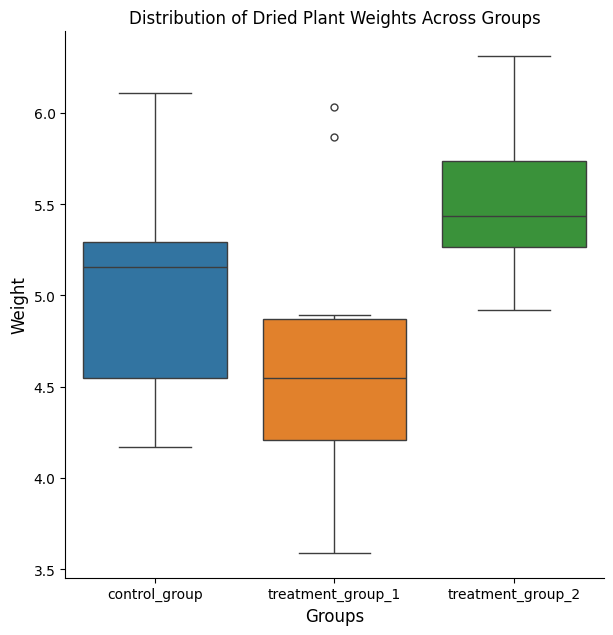

In [6]:
#Creating a data frame to use seaborn
df = pd.DataFrame({
    'control_group':control,
    'treatment_group_1':trit1,
    'treatment_group_2':trit2
})

# Creating a box-and-whisker plot to visualize the distribution 
# and determine whether there are significant outliers.
sns.catplot(df, kind='box', height=6)
plt.title("Distribution of Dried Plant Weights Across Groups")
plt.xlabel("Groups", fontsize=12)
plt.ylabel("Weight", fontsize=12)
plt.show()


Outliers persist in Treatment Group 1, but I will consider them insignificant.

3. Assumption of homogeneity of variance.
The assumption of homogeneity of variance is important for a t-test because it ensures that each group's variability is similar, allowing for accurate test statistics and valid p-values.<br>
[Levene’s test](https://www.geeksforgeeks.org/levenes-test/) is used to assess the equality of variance between two different samples. 

**The null hypothesis** for Levene’s test is that the variance among groups is equal.<br>
**The alternative hypothesis** is that the variance among different groups is not equal.

In [7]:
# Levene's Test of Equality of Variances

alpha = 0.05

# Using Itertools Combinations() function to conduct the tests for all groups in the loop
groups = [control, trit1, trit2]
group_names = ['control', 'trit1', 'trit2']

# Generating all pairs of groups
for (group1, group2), (name1,name2) in zip(itertools.combinations(groups, 2), itertools.combinations(group_names, 2)):

    w_stats, p_value = levene(group1, group2, center='mean')
 
    if p_value > alpha:
        print(f"The null hypothesis is not rejected for {name1} and {name2}. The variance among groups is equal.")
    else:
        print(f"Reject the Null Hypothesis for {name1} and {name2}. The variance among groups is not equal.")

The null hypothesis is not rejected for control and trit1. The variance among groups is equal.
The null hypothesis is not rejected for control and trit2. The variance among groups is equal.
The null hypothesis is not rejected for trit1 and trit2. The variance among groups is equal.


## $t$-test. 
**The $t$-Test** is a statistical test procedure that tests whether there is a significant difference between the means of two groups.

According to the task, it is necessary to determine whether there is a statistically significant difference between Treatment Group 1 and Treatment Group 2. The necessary assumptions have been checked, and outliers were detected in one of the groups, which may affect the accuracy of the test. If the assumptions are not met, alternative tests, such as the Mann-Whitney U test or the Wilcoxon test, may be considered.

### Hypothesis:
**The null hypothesis**: There is no evidence of a significant difference between Treatment Group 1 and Treatment Group 2.<br>
**The alternative hypothesis**: The null hypothesis is not supported. There might be a difference between Treatment Group 1 and Treatment Group 2.




In [8]:
# Two samples
x = trit1
y = trit2

# significance level
alpha = 0.05

# Function for paired t-test:
def indep_ttest(first_sample,second_sample,signif_lv):

    t_stat, p_val = stats.ttest_ind(x,y)

    print("t-statistic = " + str(t_stat))  
    print("p-value = " + str(p_val))
    print("------------------------") 

    if p_val <= alpha:
        print('There might be a statistical difference between the two samples.')
    else:
        print('There is no evidence that the difference\nbetween the samples is statistically significant.')    

indep_ttest(x,y,alpha)


t-statistic = -3.0100985421243616
p-value = 0.0075184261182198574
------------------------
There might be a statistical difference between the two samples.


The t-test suggests that there might be a difference between Treatment Group 1 and Treatment Group 2.

## ANOVA 

**ANOVA** (Analysis of Variance) is a statistical method used to test if there are significant differences between the means of three or more independent groups. It compares the variance within each group to the variance between the groups. The goal of ANOVA is to determine whether any of the group means are significantly different from each other.

The $t$-test is designed to be performed on two groups at a time. Performing multiple t-tests increases the risk of making a Type I error (false positive). ANOVA compares all three groups simultaneously, providing a single test to check for differences across all groups.

**The Null Hypothesis** for ANOVA: There is no significant statistical difference between the samples.<br>
**The Alternative Hypothesis** for ANOVA: There might be a difference between the samples.<br>

If the p-value < 0.05, we reject the null hypothesis (The difference is possible).

In the given case a Type II error may happen when the p-value > 0.05, so we don’t reject the null hypothesis, even though it’s actually false. 

### Assumptions
The conduction of ANOVA requires meeting certain assumptions, which were checked earlier:

1. The samples are independent: The data for each group were collected from separate, unrelated groups.<br>
2. Each sample is from a normally distributed population: The normality assumption was verified, and the data from each group are approximately normally distributed.<br>
3. The population standard deviations of the groups are equal (homoscedasticity): The assumption of equal variances was tested, and no significant violation was found.<br>

Since these assumptions are met, ANOVA can be performed to test for differences between the groups.

In [9]:
# Performing the One-way ANOVA
f, p_value = f_oneway(control, trit1, trit2)
if p_value > 0.05:
    print('There is no evidence that the difference\nbetween the samples is statistically significant.')
else:
    print('There might be a statistical difference between the two samples.')

There might be a statistical difference between the two samples.


## Summary
The analysis of the plant growth experiment included data from three groups: a **Control** group and two treatment groups (**Treatment 1** and **Treatment 2**). Descriptive statistics showed that the average weight of plants in the **control** group (5.03) and **Treatment 2** (5.53) were higher compared to **Treatment 1** (4.66), which also exhibited greater variability in weights (standard deviation of 0.79). Despite some outliers present in **Treatment 1**, they were considered not significant for the analysis. The Shapiro-Wilk test confirmed that the data from all three groups followed a normal distribution. Levene's test for equality of variances indicated no significant differences between the groups' variances, supporting the assumption of homogeneity of variance.

## Conclusion
The results of both the ANOVA and &t$-test indicated that there might be a statistically significant difference between the groups. Specifically, the differences between **Treatment 1** and the other two groups (Control and Treatment 2) suggest that the treatment conditions applied to **Treatment 1** might have had a different effect on plant growth compared to the other two conditions. Given that the assumptions of normality, independence, and homoscedasticity were met, the analysis provides sufficient evidence to reject the null hypothesis, supporting the presence of a significant effect of treatment on plant growth.

# End